# Comparison of Individual, Bagging and Boosting Algorithms

In [1]:
!pip install xgboost -quiet


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# import the data
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(33265, 10)

In [6]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy score:  0.696076957763415
Precision score:  0.696076957763415
Recall score:  0.696076957763415
F1 score:  0.696076957763415
Confusion matrix: 
 [[ 177   25    3    3    7]
 [  15  428   10   27  134]
 [   3   24 1880  187  345]
 [   8   28  226 1341  267]
 [   4  162  308  236  805]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       215
           1       0.64      0.70      0.67       614
           2       0.77      0.77      0.77      2439
           3       0.75      0.72      0.73      1870
           4       0.52      0.53      0.52      1515

    accuracy                           0.70      6653
   macro avg       0.71      0.71      0.71      6653
weighted avg       0.70      0.70      0.70      6653

CPU times: total: 906 ms
Wall time: 1.12 s


Text(95.72222222222221, 0.5, 'Actual')

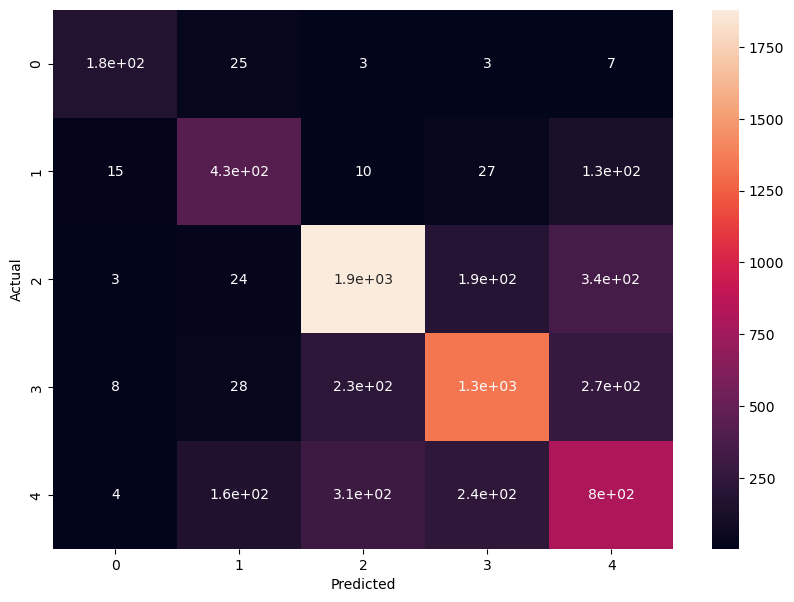

In [7]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict the test data
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='micro')
dt_recall = recall_score(y_test, y_pred, average='micro')
dt_f1 = f1_score(y_test, y_pred, average='micro')
dt_cm = confusion_matrix(y_test, y_pred)
dt_report = classification_report(y_test, y_pred)

print('Accuracy score: ', dt_accuracy)
print('Precision score: ', dt_precision)
print('Recall score: ', dt_recall)
print('F1 score: ', dt_f1)
print('Confusion matrix: \n', dt_cm)
print('Classification report: \n', dt_report)
# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Accuracy score:  0.7646174658049001
Precision score:  0.7646174658049001
Recall score:  0.7646174658049001
F1 score:  0.7646174658049001
Confusion matrix: 
 [[ 193   10    3    4    5]
 [   9  423   12   26  144]
 [   3    6 2178  128  124]
 [   0    8  209 1469  184]
 [   0   89  314  288  824]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       215
           1       0.79      0.69      0.74       614
           2       0.80      0.89      0.85      2439
           3       0.77      0.79      0.78      1870
           4       0.64      0.54      0.59      1515

    accuracy                           0.76      6653
   macro avg       0.79      0.76      0.77      6653
weighted avg       0.76      0.76      0.76      6653



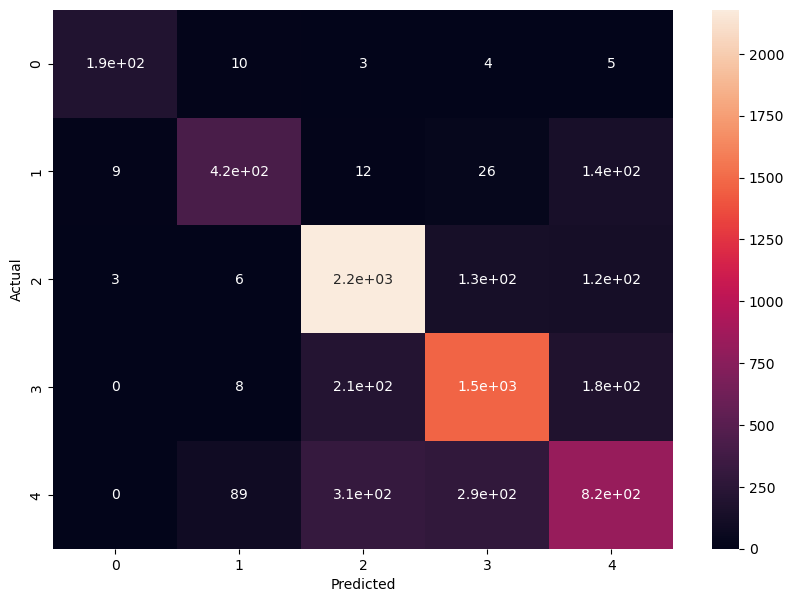

CPU times: total: 12.7 s
Wall time: 18.1 s


In [8]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1 = f1_score(y_test, y_pred, average='micro')
rf_cm = confusion_matrix(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

print('Accuracy score: ', rf_accuracy)
print('Precision score: ', rf_precision)
print('Recall score: ', rf_recall)
print('F1 score: ', rf_f1)
print('Confusion matrix: \n', rf_cm)
print('Classification report: \n', rf_report)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy score:  0.7832556741319705
Precision score:  0.7832556741319705
Recall score:  0.7832556741319705
F1 score:  0.7832556741319705
Confusion matrix: 
 [[ 189   17    2    3    4]
 [   8  439    9   12  146]
 [   3    5 2163  114  154]
 [   0    1  216 1493  160]
 [   0   97  300  191  927]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       215
           1       0.79      0.71      0.75       614
           2       0.80      0.89      0.84      2439
           3       0.82      0.80      0.81      1870
           4       0.67      0.61      0.64      1515

    accuracy                           0.78      6653
   macro avg       0.80      0.78      0.79      6653
weighted avg       0.78      0.78      0.78      6653



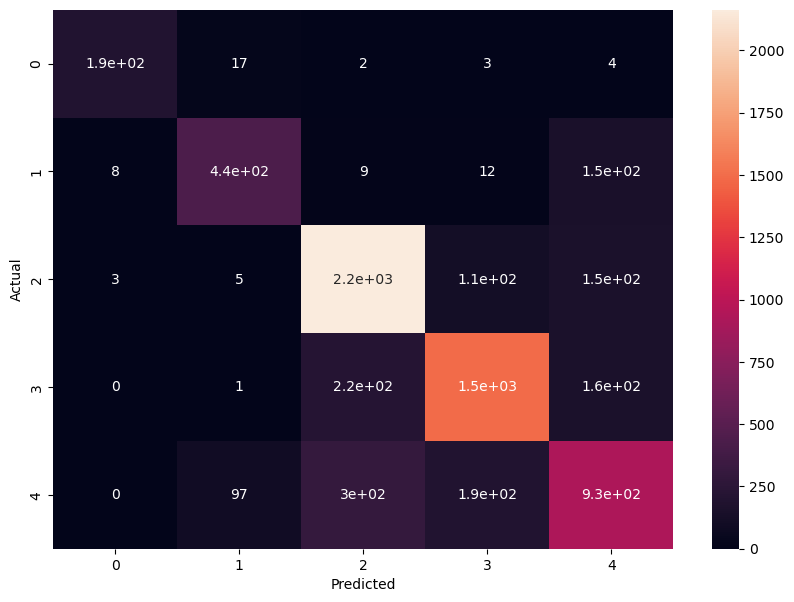

CPU times: total: 5.78 s
Wall time: 3.26 s


In [9]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average='micro')
xgb_recall = recall_score(y_test, y_pred, average='micro')
xgb_f1 = f1_score(y_test, y_pred, average='micro')
xgb_cm = confusion_matrix(y_test, y_pred)
xgb_report = classification_report(y_test, y_pred)

print('Accuracy score: ', xgb_accuracy)
print('Precision score: ', xgb_precision)
print('Recall score: ', xgb_recall)
print('F1 score: ', xgb_f1)
print('Confusion matrix: \n', xgb_cm)
print('Classification report: \n', xgb_report)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

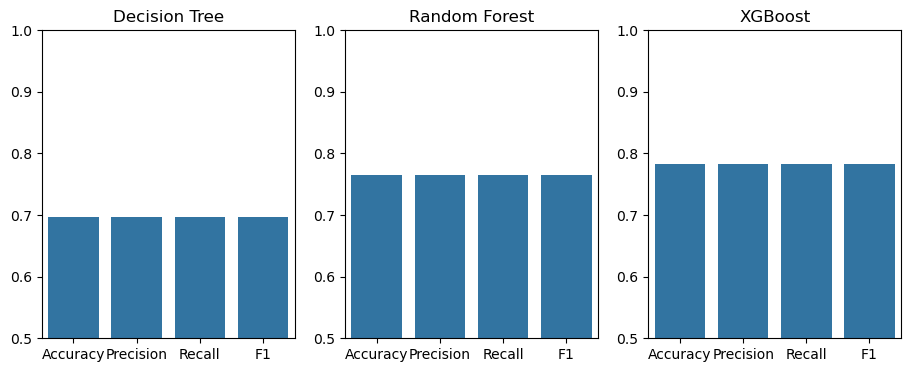

In [10]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[dt_accuracy, dt_precision, dt_recall, dt_f1])
plt.title('Decision Tree')
# Y axis limit
plt.ylim(0.5, 1.0)
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[rf_accuracy, rf_precision, rf_recall, rf_f1])
plt.title('Random Forest')
# Y axis limit
plt.ylim(0.5, 1.0)
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1])
plt.title('XGBoost')
# Y axis limit
plt.ylim(0.5, 1.0)
# plt.tight_layout()
plt.show()

---